In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("spam.tsv",sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [17]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [19]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [21]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [23]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [27]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [39]:
#In order to equalize the sizes of ham and spam
ham=ham.sample(spam.shape[0])

In [41]:
ham

,label,message,length,punct
3718,ham,I'm gonna rip out my uterus.,28,2
796,ham,it's really getting me down just hanging around.,48,2
3144,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...,156,12
3032,ham,gonna let me know cos comes bak from holiday ...,95,4
1609,ham,Are your freezing ? Are you home yet ? Will yo...,152,6
...,...,...,...,...
1647,ham,Thts wat Wright Brother did to fly..,36,2
1516,ham,I wonder if you'll get this text?,33,2
3489,ham,Still i have not checked it da. . .,35,3
3582,ham,Ard 4 lor...,12,3


In [43]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [45]:
data=ham.append(spam,ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11712\3447091323.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


In [47]:
data.shape

(1494, 4)

In [49]:
data

,label,message,length,punct
0,ham,I'm gonna rip out my uterus.,28,2
1,ham,it's really getting me down just hanging around.,48,2
2,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...,156,12
3,ham,gonna let me know cos comes bak from holiday ...,95,4
4,ham,Are your freezing ? Are you home yet ? Will yo...,152,6
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


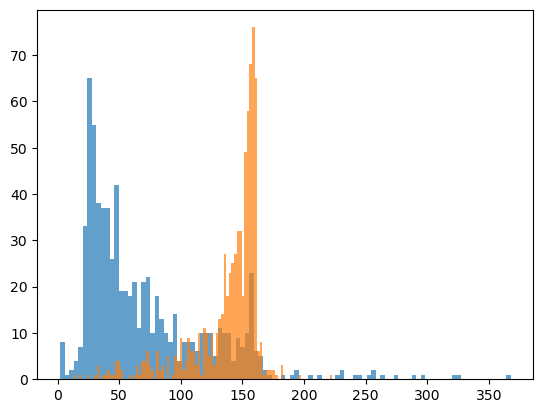

In [55]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

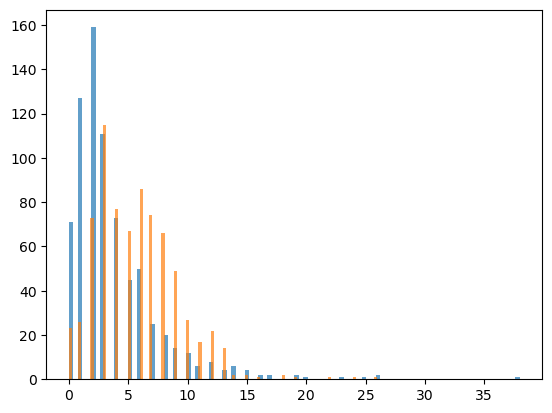

In [57]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size = 0.3,random_state =0)

In [85]:
X_train

1438      You have 1 new message. Please call 08715205273
431     HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
194                       Ok i msg u b4 i leave my house.
240                           Aight, lemme know what's up
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559     Tell you what, if you make a little spreadshee...
684     I promise to take good care of you, princess. ...
Name: message, Length: 1045, dtype: object

In [87]:
X_train.shape

(1045,)

In [89]:
X_test.shape

(449,)

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [93]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("rf",RandomForestClassifier(n_estimators=100))])

In [95]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [99]:
y_pred=classifier.predict(X_test)

In [101]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [103]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [105]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [107]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 20, 202]], dtype=int64)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [135]:
from sklearn.svm import SVC

In [137]:
svm=Pipeline([("tfidf",TfidfVectorizer()),("svm",SVC(C = 100))])

In [139]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC(C=100))])

In [141]:
y_pred=svm.predict(X_test)

In [143]:
accuracy_score(y_test, y_pred)

0.9710467706013363

In [145]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 10, 212]], dtype=int64)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       227
        spam       0.99      0.95      0.97       222

    accuracy                           0.97       449
   macro avg       0.97      0.97      0.97       449
weighted avg       0.97      0.97      0.97       449



In [161]:
test1 = ['Hello, You are the winner! Pres 1111 for your prize']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [163]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [165]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['spam']
['ham']
['spam']
